In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

In [2]:
PSD_dir = "../../../../data/test_correlation/data_mahy"
output_path = "/home/imonge/Documents/Masking" # Output repository for the plots
hydrophone_number = 1 # choose between 1, 2, 3, 4

In [3]:
# Select stations for the chose hydrophone
if hydrophone_number != 4:
    selected_stations = [f"MAHY0{hydrophone_number}",
                         f"MAHY1{hydrophone_number}",
                         f"MAHY2{hydrophone_number}",
                         f"MAHY3{hydrophone_number}",
                         f"MAHY4{hydrophone_number}",
                         ]
else:
    selected_stations = [f"MAHY0{hydrophone_number}",
                         f"MAHY1{hydrophone_number}",
                         f"MAHY3{hydrophone_number}",
                         f"MAHY4{hydrophone_number}",
                         ]

In [4]:
# Load the PSD data
psds_all = []
for station in selected_stations:
    psd_path = os.path.join(PSD_dir, f"{station}.pkl")
    psds_all.append(pd.read_pickle(psd_path))

# Concatenate psds
psd_df = pd.concat(psds_all).sort_index()

# Change 0 to NaN
psd_df.replace(0, np.nan, inplace=True)

# Change absent data to Nan
full_index = pd.date_range(start=psd_df.index.min(), end=psd_df.index.max(), freq="h")
psd_reindexed = psd_df.reindex(full_index)

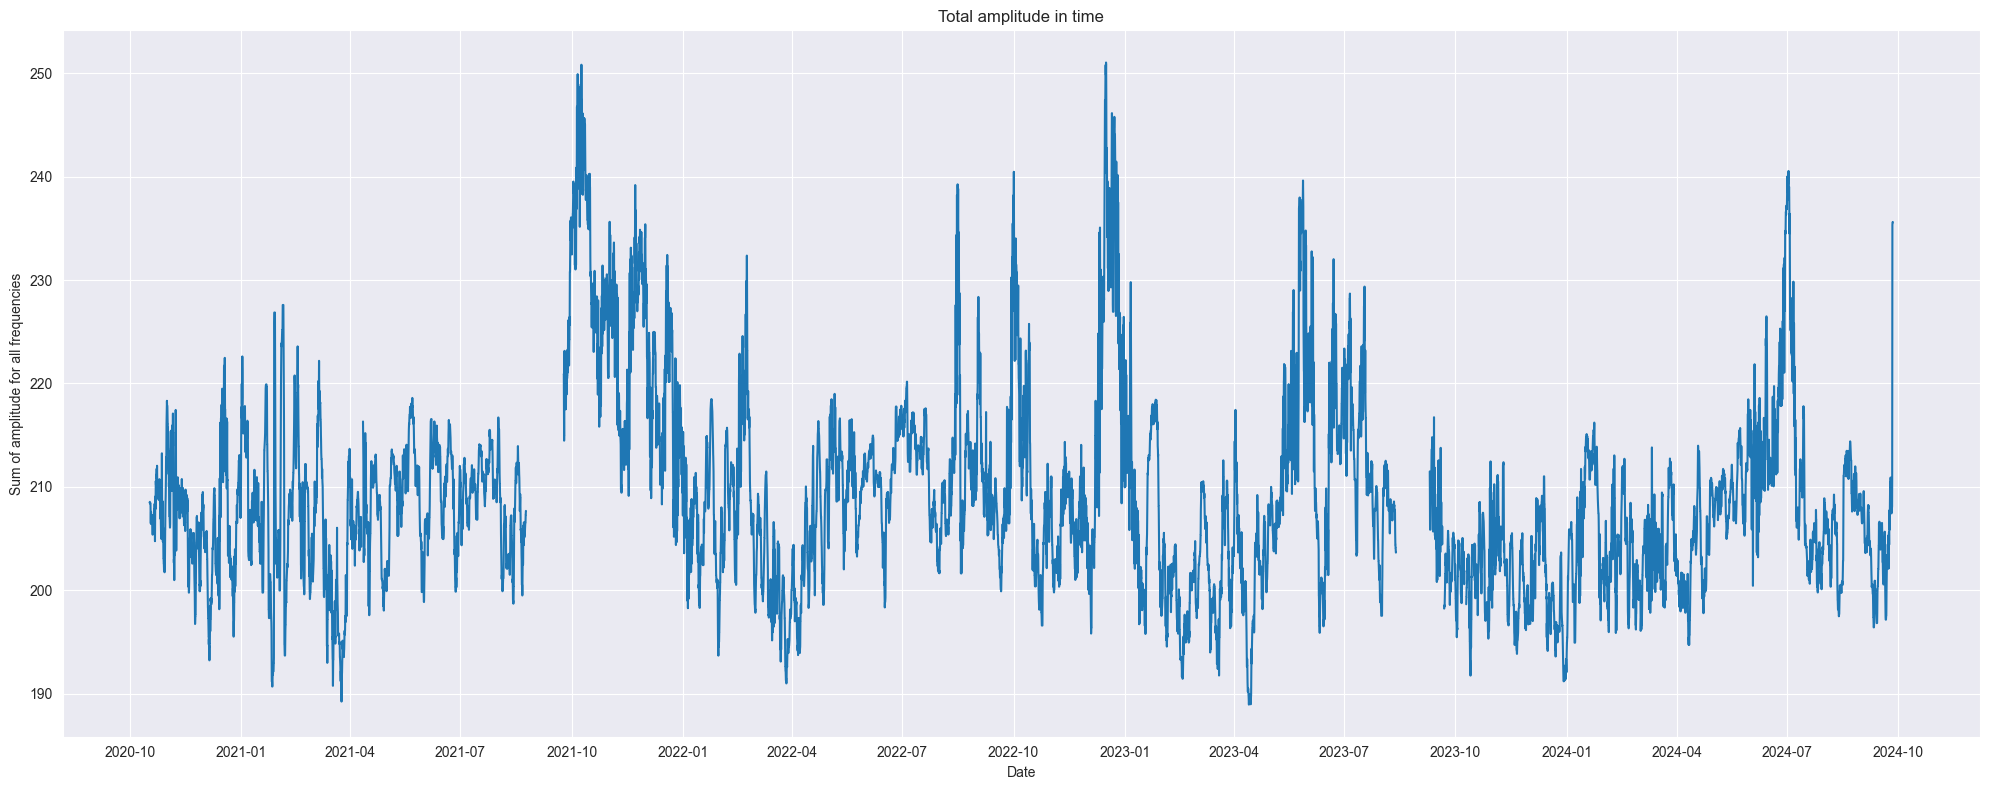

In [5]:
## Plot total amplitude in time (for all frequencies)
psd_total = psd_reindexed.mean(axis=1)
psd_total = np.log(psd_total) * 10

# Median filter
psd_filt = psd_total.rolling(window=30).median()

# Plot
plt.figure(figsize=(20,8))
plt.plot(psd_total.index, psd_filt.values, label="Total amplitude of the psd")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# plt.gca().xaxis.set_major_locator(mdates.DateFormatter('%Y-%m'))

plt.title("Total amplitude in time")
plt.xlabel("Date")
plt.ylabel("Sum of amplitude for all frequencies")
plt.grid(True)
plt.tight_layout()
plt.show()

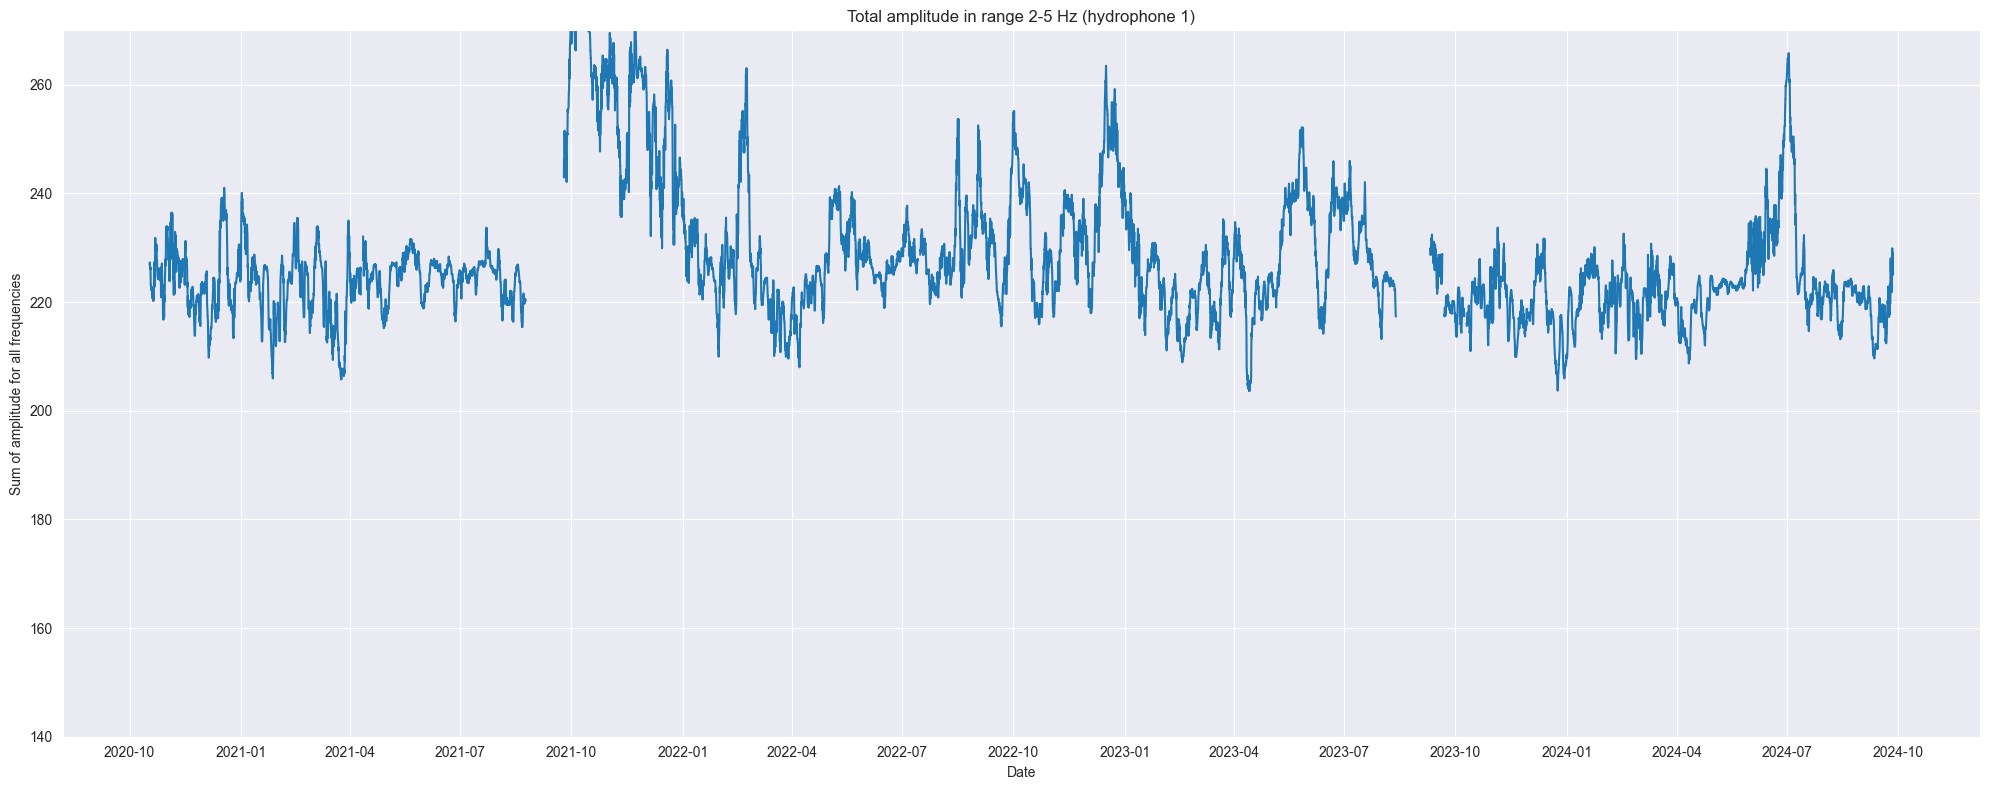

In [6]:
## Plot total amplitude in time for specified ranges
fmin = 2
fmax = 5
freq_range = (fmin, fmax)
frequencies = [f for f in psd_df.columns if freq_range[0] <= f <= freq_range[1]]

psd_band = psd_reindexed[frequencies]
psd_total = psd_band.mean(axis=1)
psd_total = np.log(psd_total) * 10

# Median filter
psd_filt = psd_total.rolling(window=40).median()

# Plot
plt.figure(figsize=(20,8))
plt.plot(psd_total.index, psd_filt.values, label="Total amplitude of the psd")

# # Darkened blocks
# for start, end in nan_blocks:
#     plt.axvspan(start, end, alpha=0.2)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# plt.gca().xaxis.set_major_locator(mdates.DateFormatter('%Y-%m'))

plt.title(f"Total amplitude in range {fmin}-{fmax} Hz (hydrophone {hydrophone_number})")
plt.xlabel("Date")
plt.ylabel("Sum of amplitude for all frequencies")
plt.ylim(140, 270)
plt.grid(True)
plt.tight_layout()
plt.show()